In [17]:
import SimpleITK as sitk
from subprocess import Popen
import subprocess
import SimpleITK as sitk
import pandas as pd
import multiprocessing as mp
import functools
from functools import partial
import sys
import os.path
from os import path as pathOs
import numpy as np
import tempfile
import shutil
from os.path import basename, dirname, exists, isdir, join, split
from pathlib import Path
import fileinput
import re
import subprocess
from toolz.itertoolz import groupby
import seaborn as sns
import einops
import matplotlib.pyplot as plt
import itertools
from elastixRegister import *

def copy_changing_type(source, dest):
    image= sitk.ReadImage(source)
    # nan_count=np.sum(np.isnan(np.array(sitk.GetArrayFromImage(image)).flatten()))
    # if(nan_count>0):
    #     raise ValueError(f"!!! nan in {source}")
    # image = sitk.DICOMOrient(image, 'LPS')
    # image.SetDirection((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)) 
    image=sitk.Cast(image, sitk.sitkFloat32)
    writer = sitk.ImageFileWriter() 
    writer.SetFileName(dest)
    writer.Execute(image)
    return dest



In [18]:
def reg_a_to_b_by_metadata_single_b(fixed_image_path,moving_image_path,out_folder):
    # moving_image_path=moving_image_path[0]
    fixed_image=sitk.ReadImage(fixed_image_path)
    moving_image=sitk.ReadImage(moving_image_path)

    # fixed_image=sitk.Cast(fixed_image, sitk.sitkUInt8)
    # moving_image=sitk.Cast(moving_image, sitk.sitkInt)
    
    arr=sitk.GetArrayFromImage(moving_image)
    resampled=sitk.Resample(moving_image, fixed_image, sitk.Transform(3, sitk.sitkIdentity), sitk.sitkBSpline, 0)
    
    # print(f" prim sum {np.sum(sitk.GetArrayFromImage(sitk.ReadImage(moving_image_path)).flatten())} \n suuum {np.sum(sitk.GetArrayFromImage(resampled).flatten())} ")
  
    writer = sitk.ImageFileWriter()
    new_path= join(out_folder,moving_image_path.split('/')[-1])
    writer.SetFileName(new_path)
    writer.Execute(resampled)

    return new_path

def get_study_0_and1(pathh,registered_path,elacticPath,transformix_path, reg_prop,temp_dir):
    innerfiles=os.listdir(join(registered_path,pathh))
    transformed= list(filter(lambda el: 'trans' in el,innerfiles))[0]
    one= list(filter(lambda el: 'sudy_1' in el,innerfiles))[0]
    transformed= join(registered_path,pathh,transformed)
    one= join(registered_path,pathh,one)
    # regg=reg_a_to_b(temp_dir,transformed,transformed,one,[],reg_prop ,elacticPath,transformix_path,'PET',reIndex=0)
    print()
    regg=reg_a_to_b_by_metadata_single_b(one,transformed,temp_dir)
    transformed_new= transformed.replace('trans','transb')
    copy_changing_type(regg, transformed_new)
    
    return transformed_new,one

temp_dir = tempfile.mkdtemp()
registered_path= '/workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered'
elacticPath='/root/elastixBase/elastix-5.0.1-linux/bin/elastix'
transformix_path='/root/elastixBase/elastix-5.0.1-linux/bin/transformix'
reg_prop='/workspaces/pilot_lymphoma/j_med/preprocessing/registration/parameters.txt'  

patient_paths=os.listdir(registered_path)
pairs_paths=list(map(lambda pat_path:get_study_0_and1(pat_path,registered_path,elacticPath,transformix_path, reg_prop,temp_dir) , patient_paths))


shutil.rmtree(temp_dir, ignore_errors=True) 



im_a (425, 100, 100) im_b (425, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_12/pat_12_sudy_0_2022-11-07_Standardized_transbbbformed.nii.gz
end


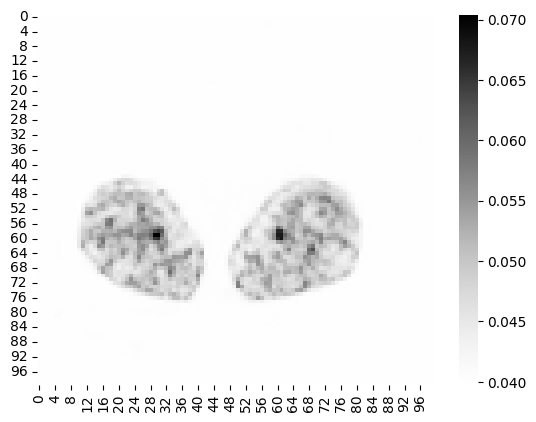

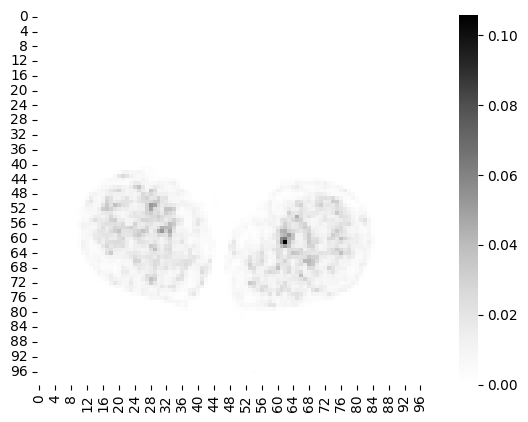

beg


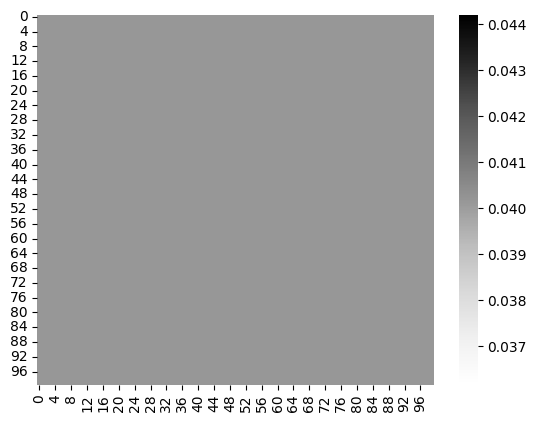

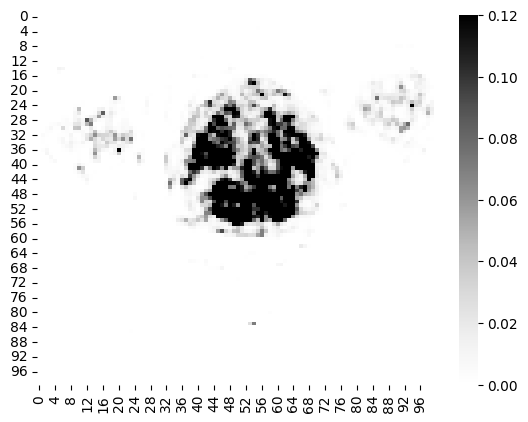

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_28/pat_28_sudy_0_2023-01-04_Standardized_transbbbformed.nii.gz
end


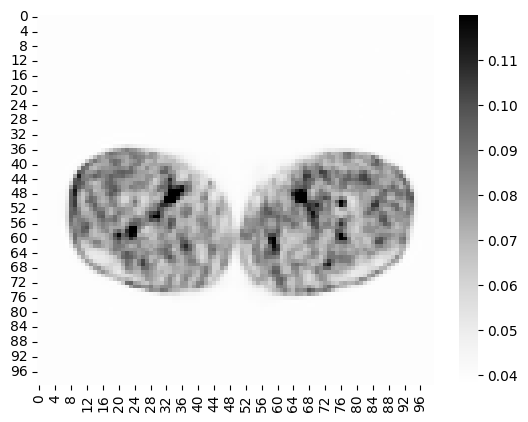

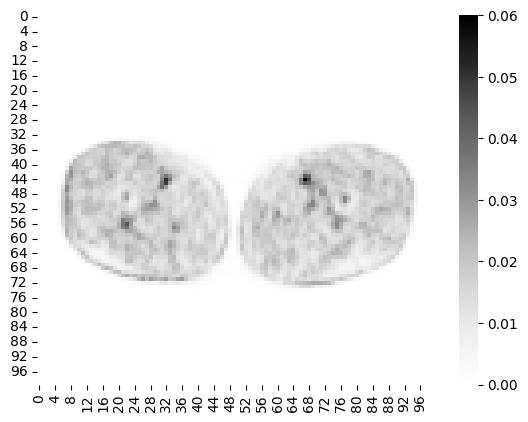

beg


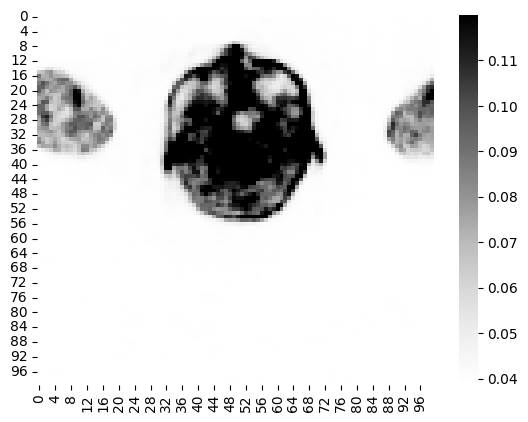

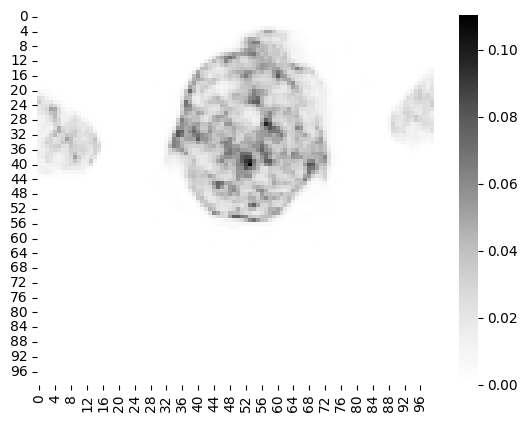

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_19/pat_19_sudy_0_2023-01-04_Standardized_transbbbformed.nii.gz
end


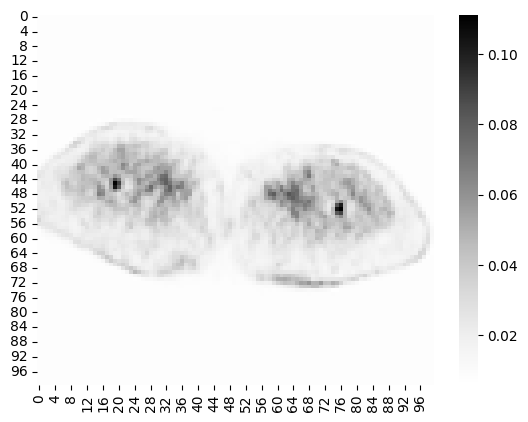

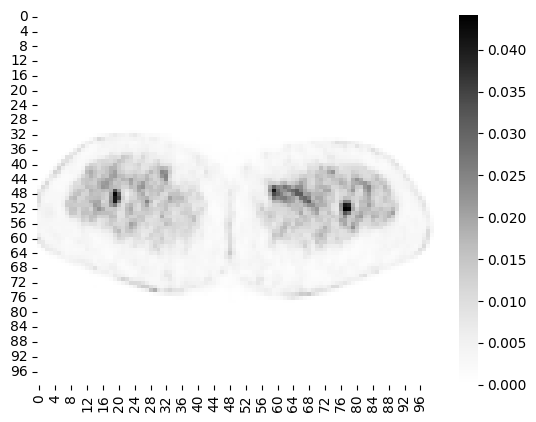

beg


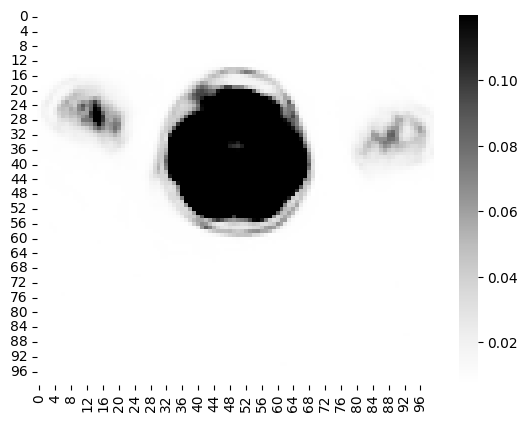

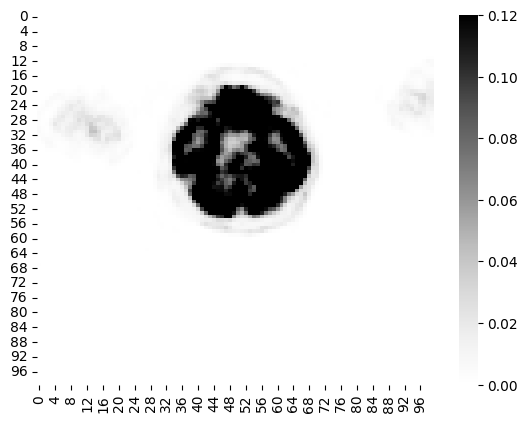

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_25/pat_25_sudy_0_2022-08-03_Standardized_transbformed.nii.gz
end


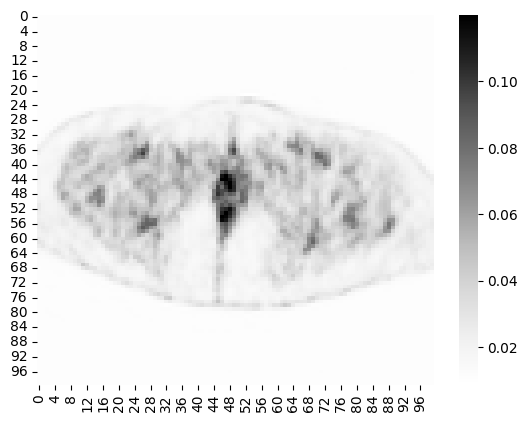

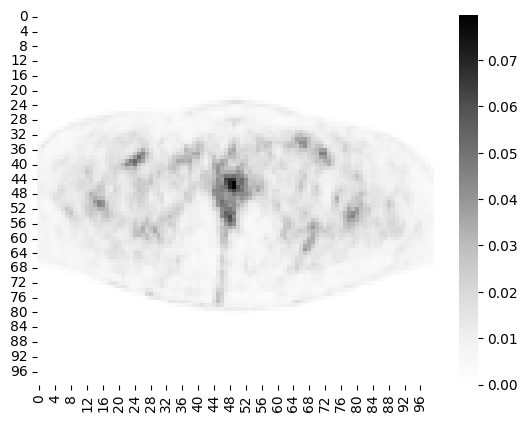

beg


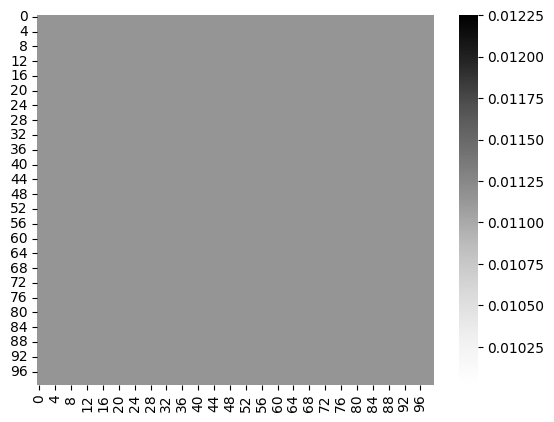

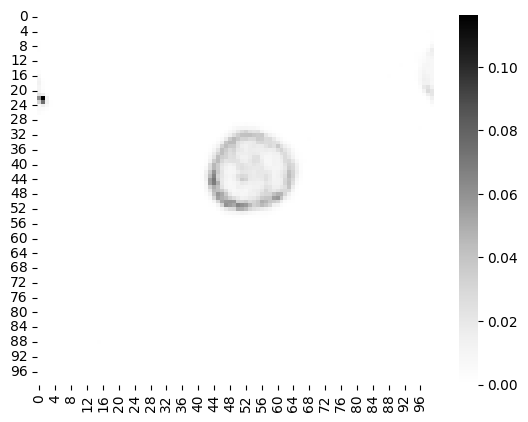

im_a (425, 100, 100) im_b (425, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_10/pat_10_sudy_0_2023-03-29_transbbbformed.nii.gz
end


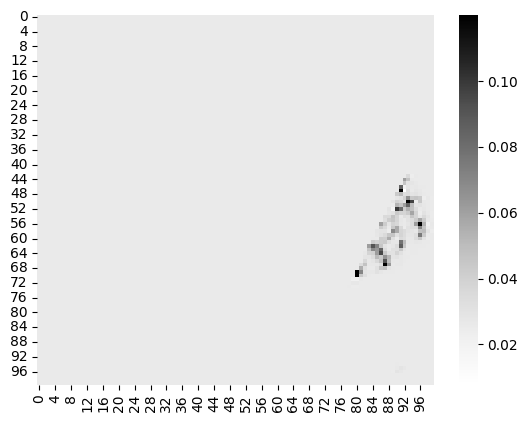

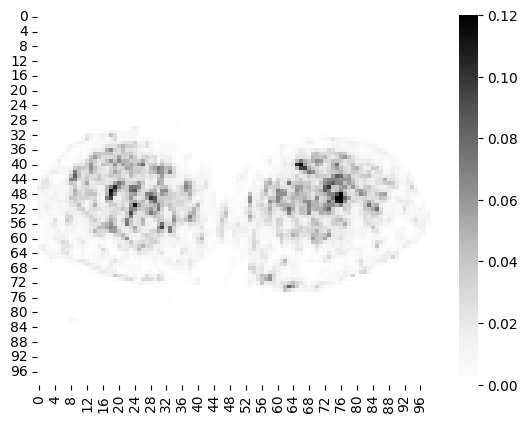

beg


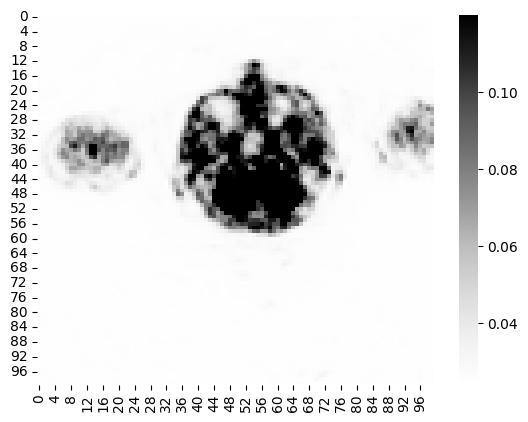

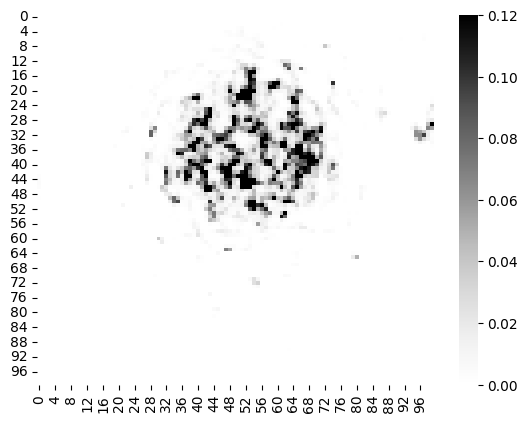

im_a (928, 100, 100) im_b (928, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_6/pat_6_sudy_0_2023-02-21_Standardized_transbformed.nii.gz
end


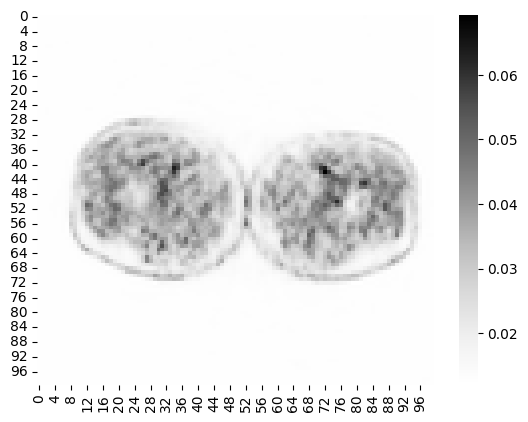

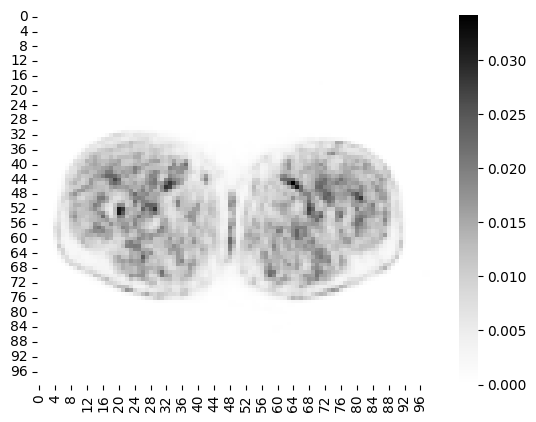

beg


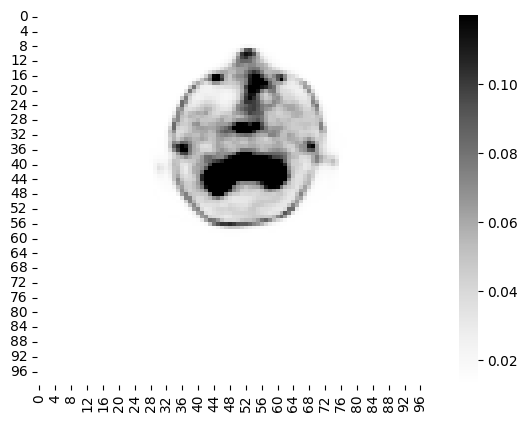

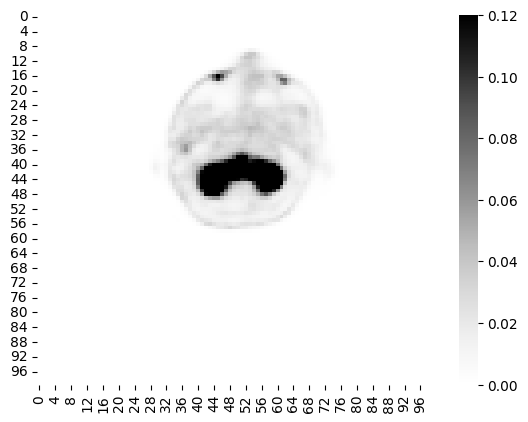

im_a (425, 100, 100) im_b (425, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_29/pat_29_sudy_0_2023-01-23_Standardized_transbformed.nii.gz
end


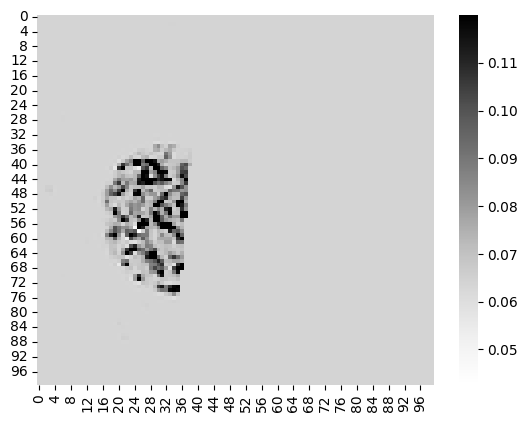

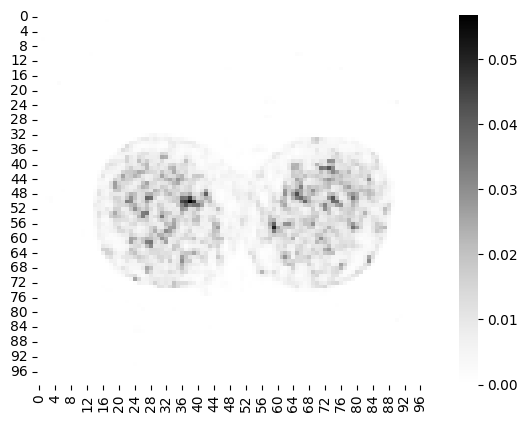

beg


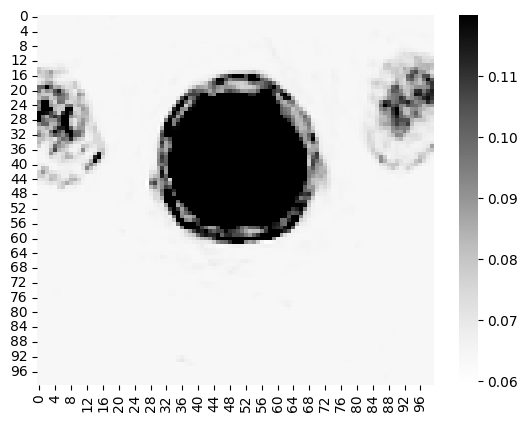

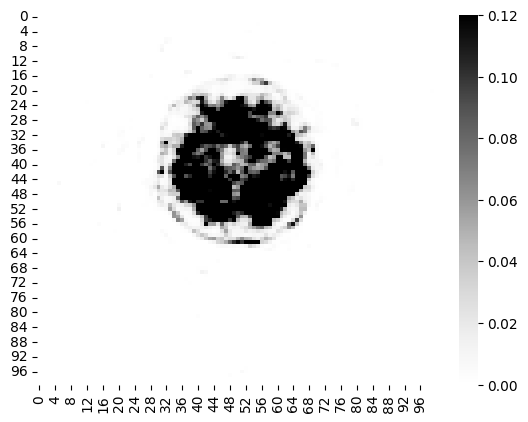

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_20/pat_20_sudy_0_2022-07-14_Standardized_transbformed.nii.gz
end


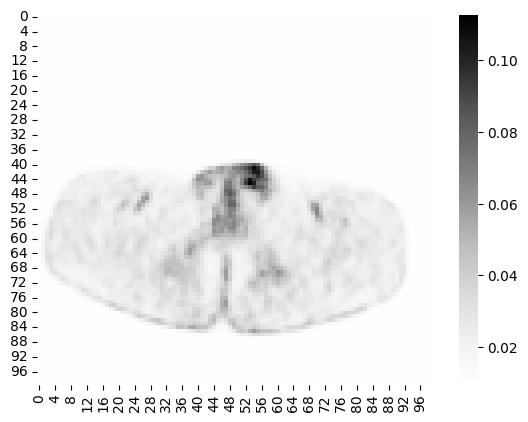

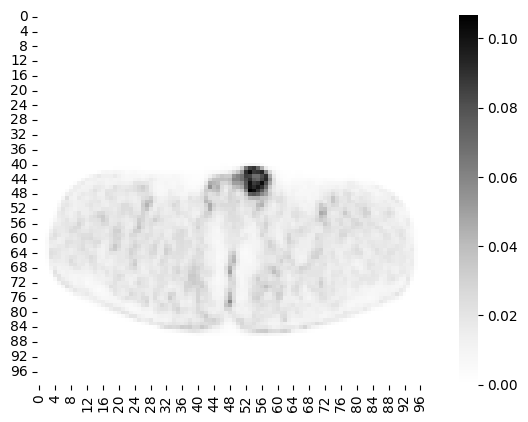

beg


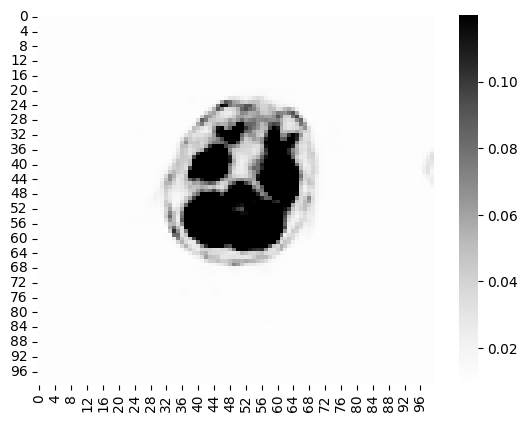

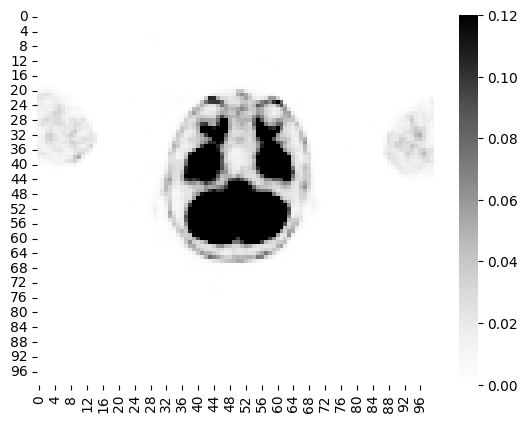

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_5/pat_5_sudy_0_2023-05-15_Standardized_transbbformed.nii.gz
end


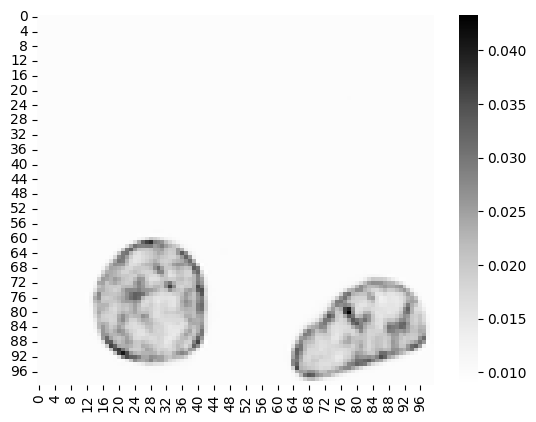

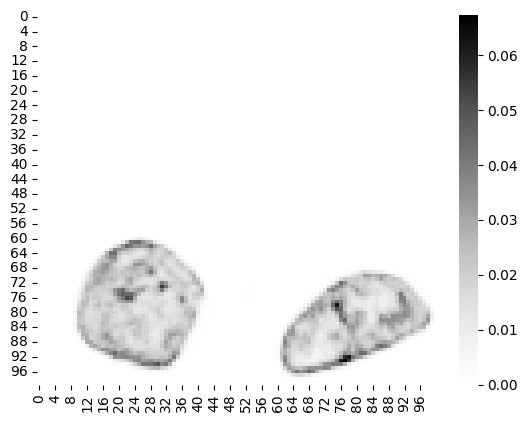

beg


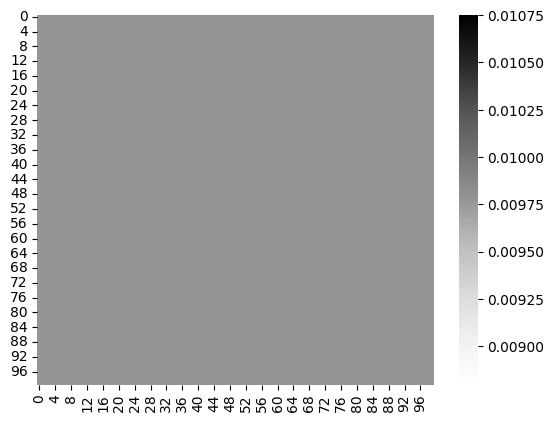

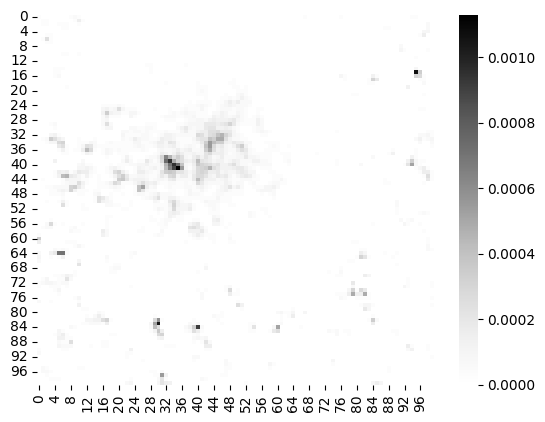

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_3/pat_3_sudy_0_2022-12-30_transbbformed.nii.gz
end


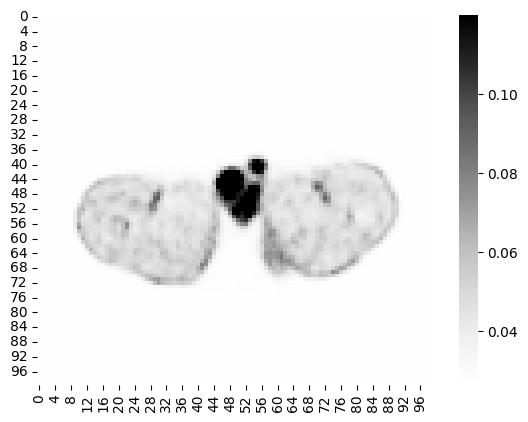

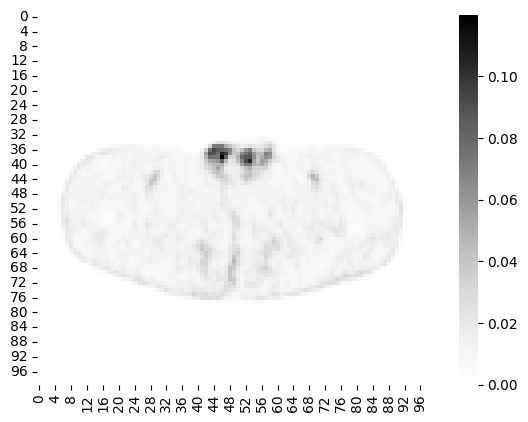

beg


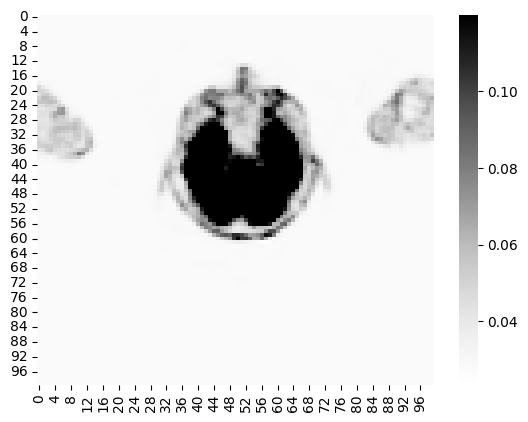

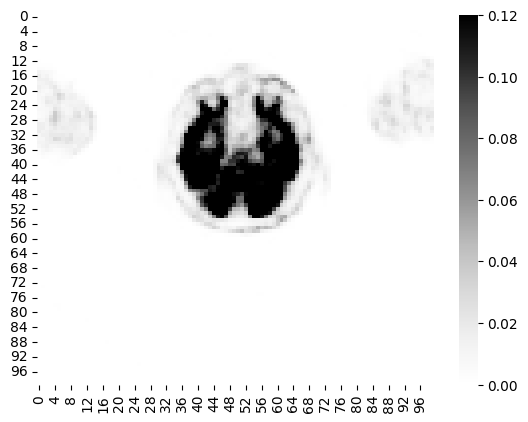

im_a (425, 100, 100) im_b (425, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_15/pat_15_sudy_0_2023-03-20_Standardized_transbbformed.nii.gz
end


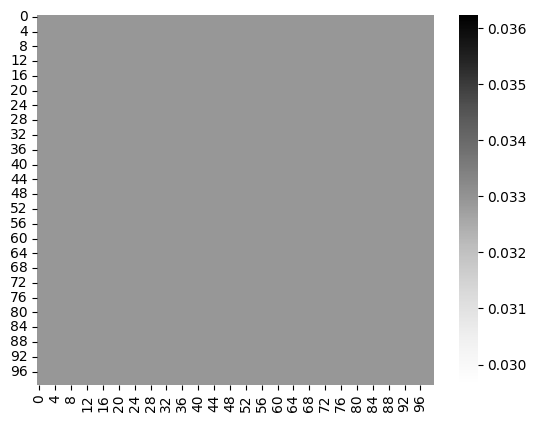

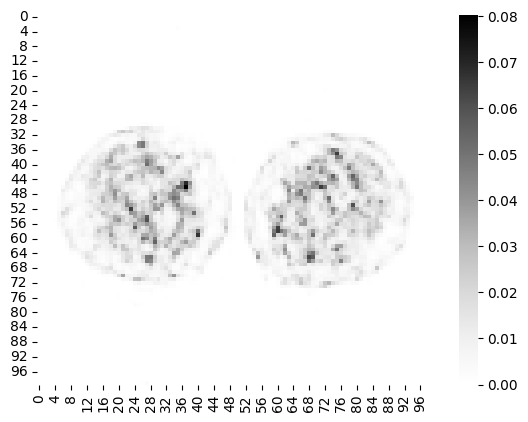

beg


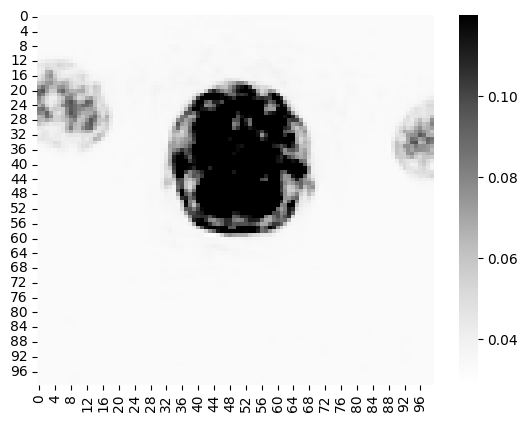

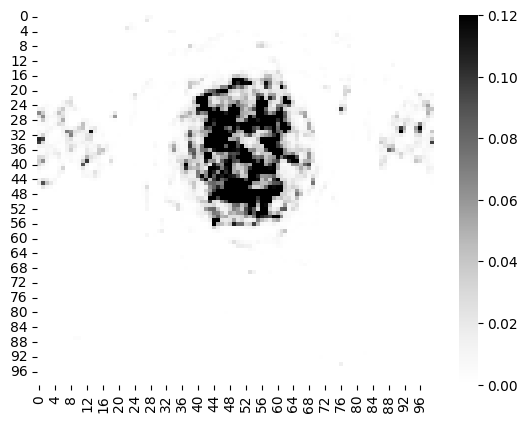

im_a (425, 100, 100) im_b (425, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_23/pat_23_sudy_0_2023-01-04_Standardized_transbbformed.nii.gz
end


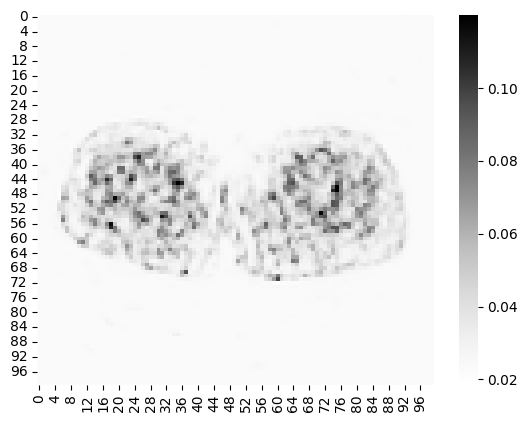

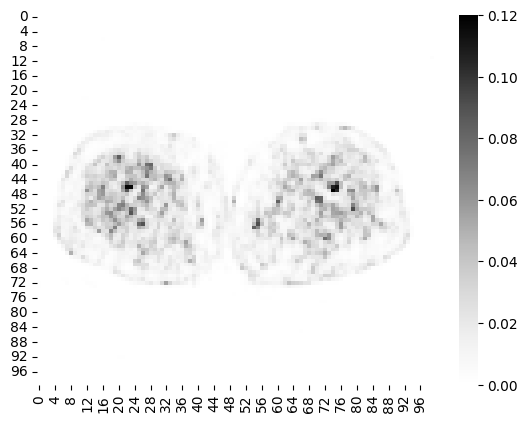

beg


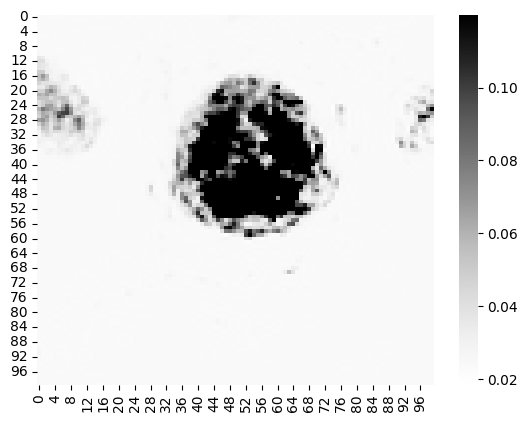

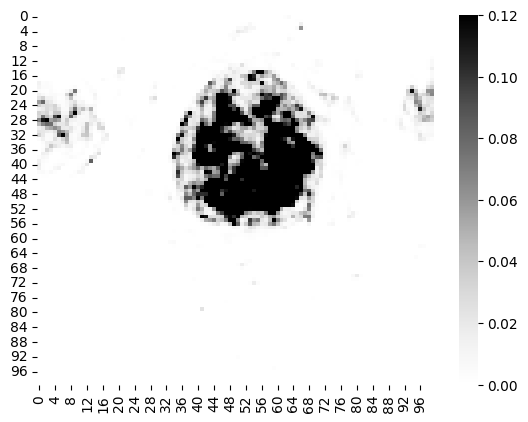

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_27/pat_27_sudy_0_2022-07-05_Standardized_transbbbformed.nii.gz
end


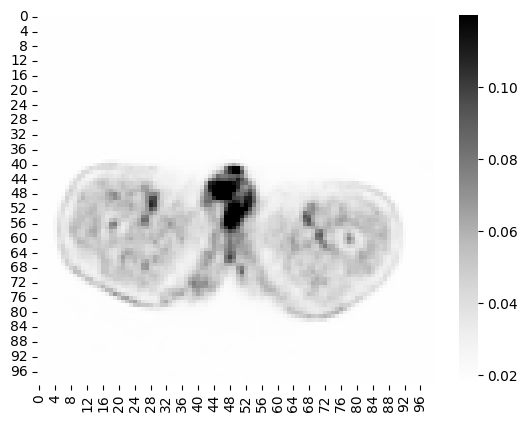

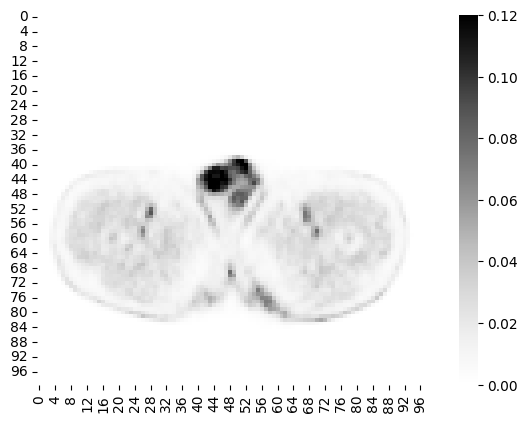

beg


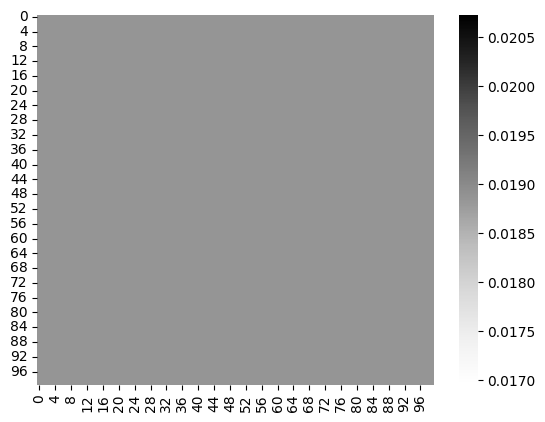

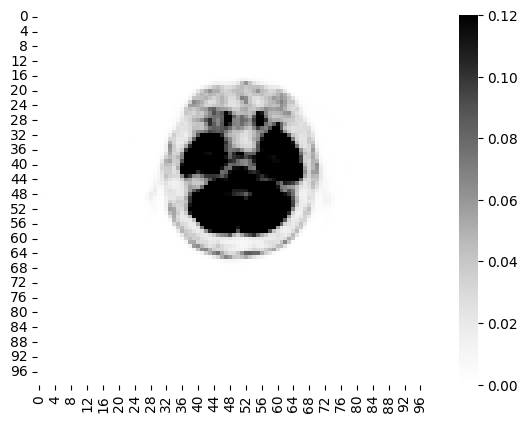

im_a (802, 100, 100) im_b (802, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_8/pat_8_sudy_0_2023-03-31_Standardized_transbbformed.nii.gz
end


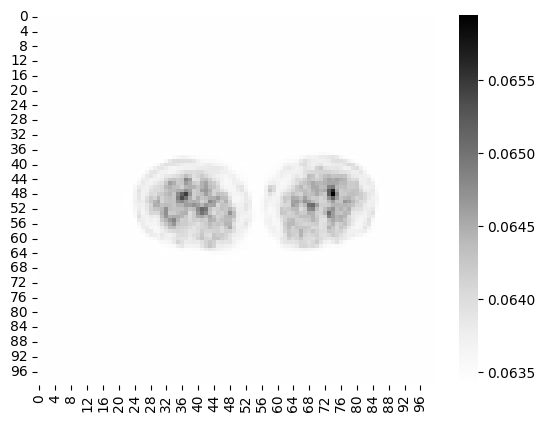

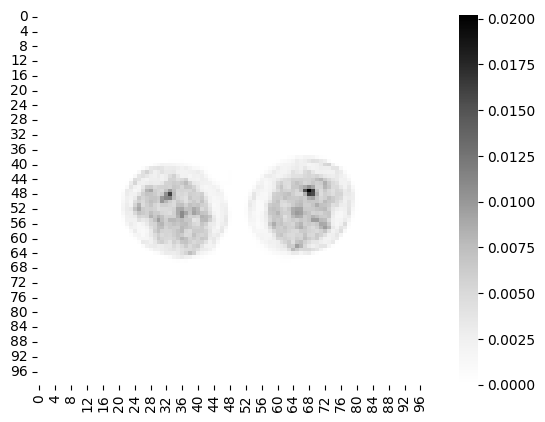

beg


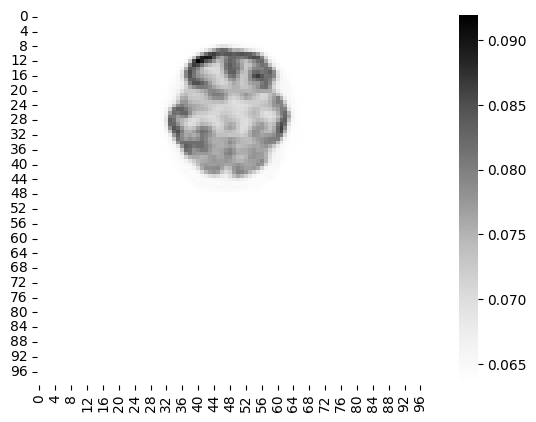

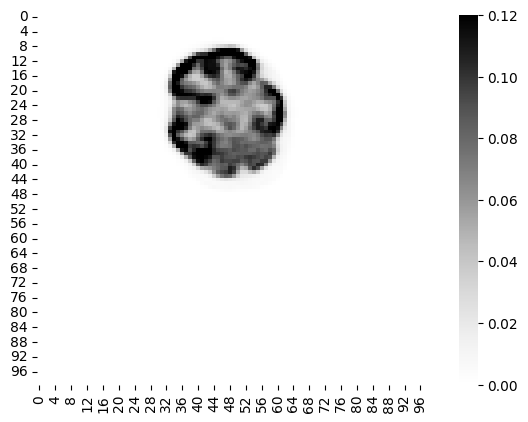

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_21/pat_21_sudy_0_2023-01-25_Standardized_transbformed.nii.gz
end


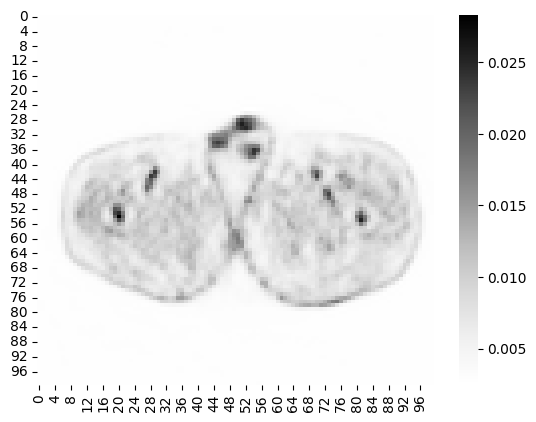

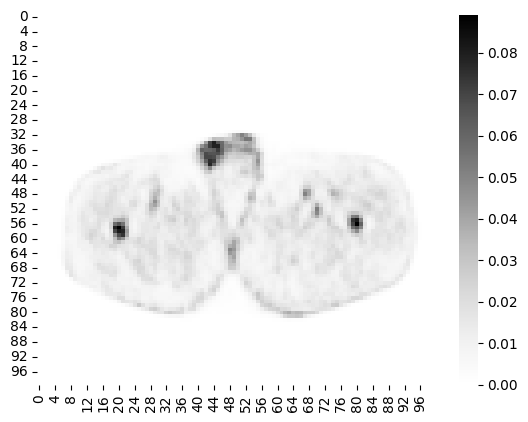

beg


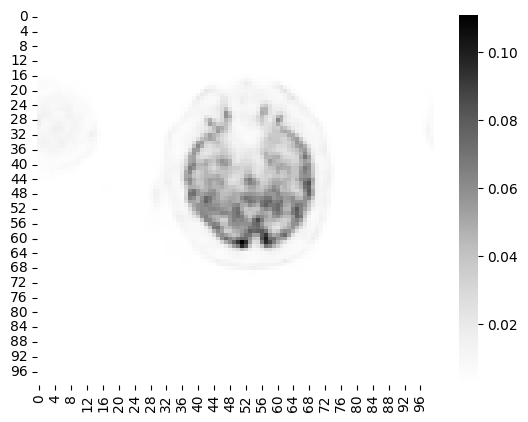

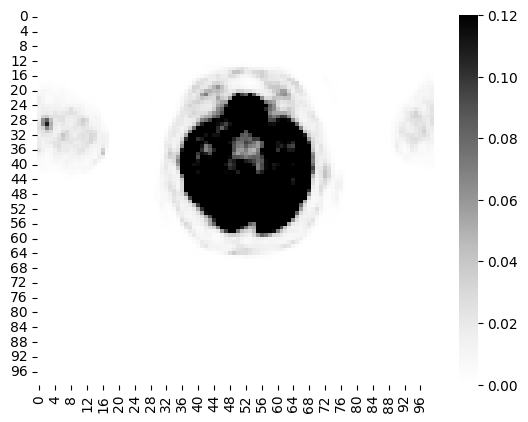

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_7/pat_7_sudy_0_2022-10-05_Standardized_transbformed.nii.gz
end


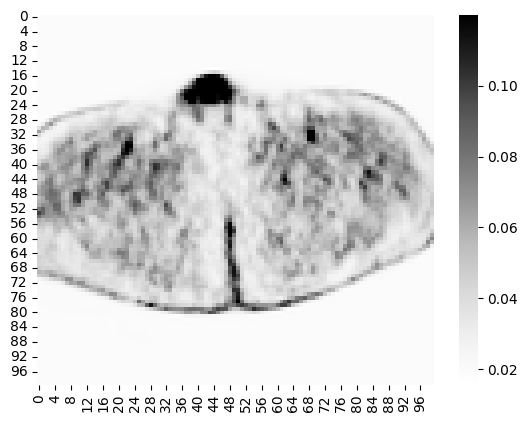

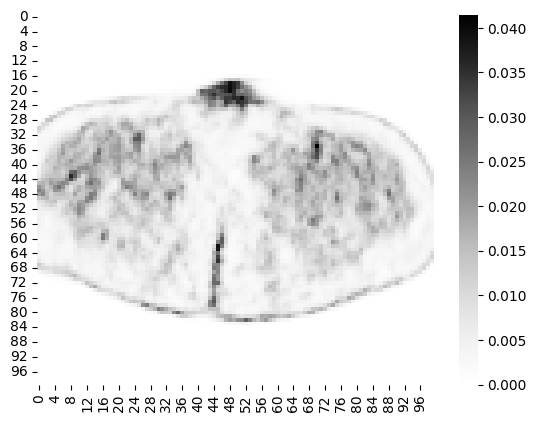

beg


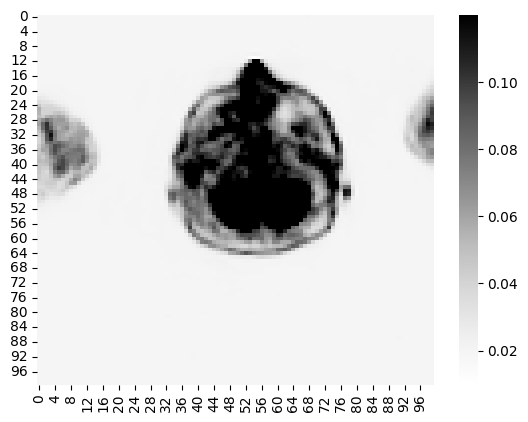

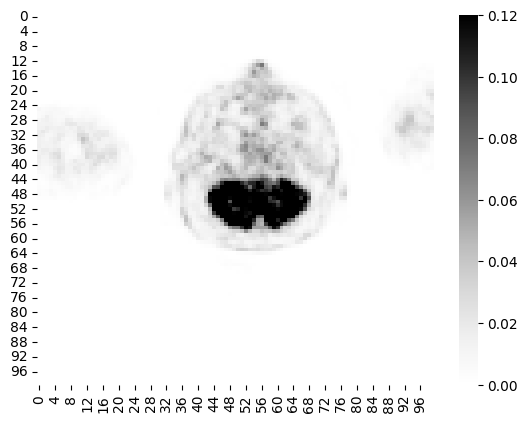

im_a (865, 100, 100) im_b (865, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_26/pat_26_sudy_0_2023-01-13_Standardized_transbformed.nii.gz
end


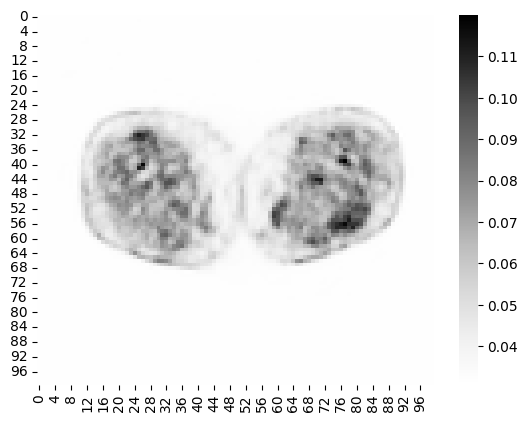

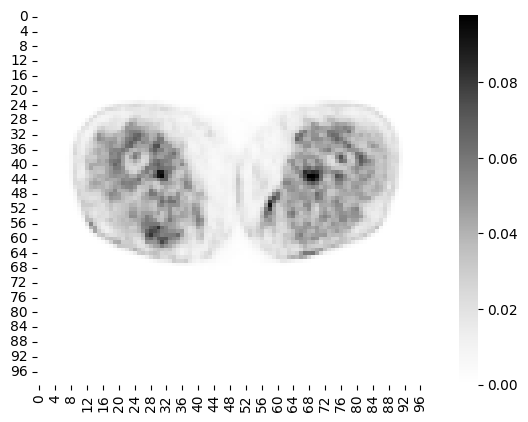

beg


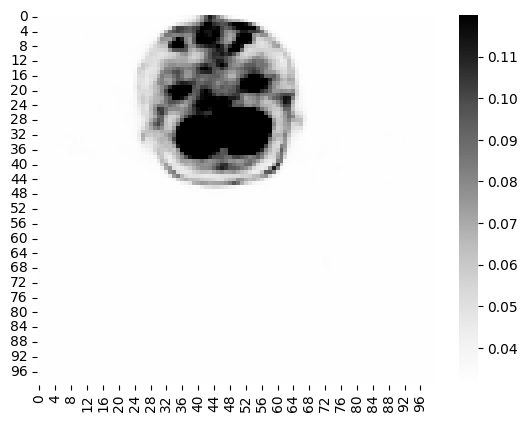

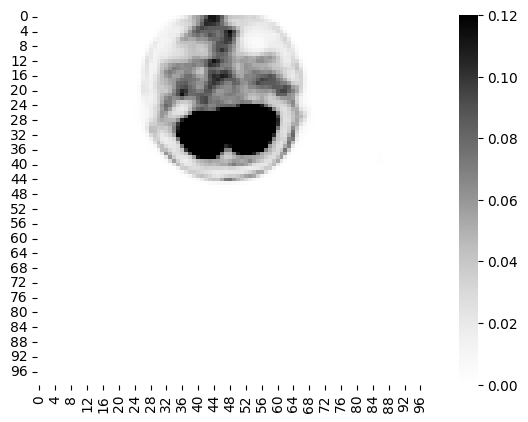

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_13/pat_13_sudy_0_2023-02-06_Standardized_transbbformed.nii.gz
end


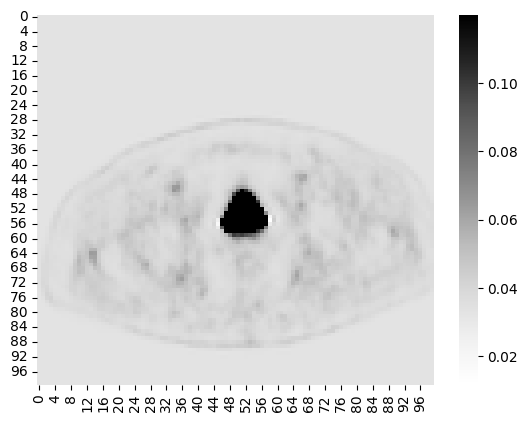

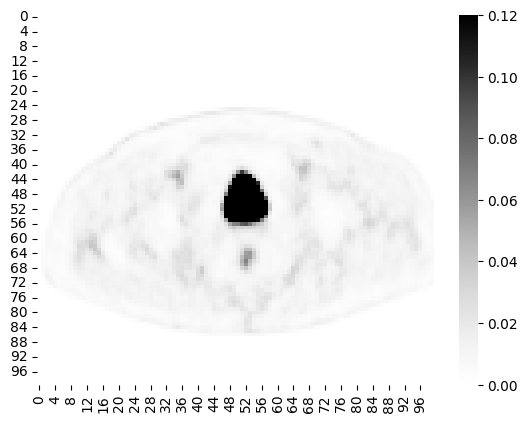

beg


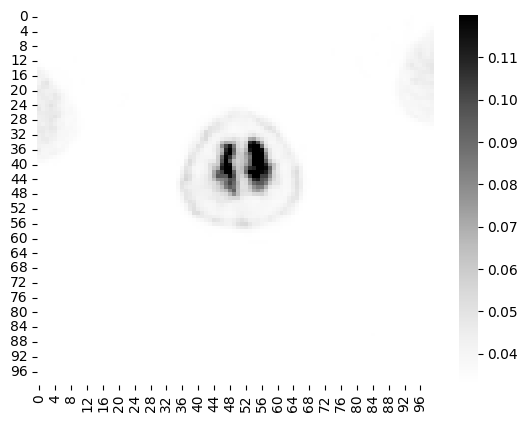

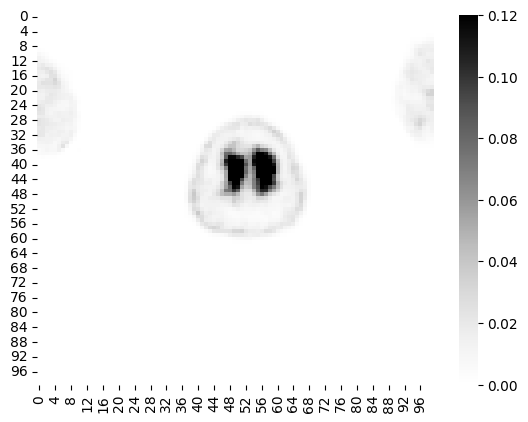

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_16/pat_16_sudy_0_2023-01-10_Standardized_Uptake_transbformed.nii.gz
end


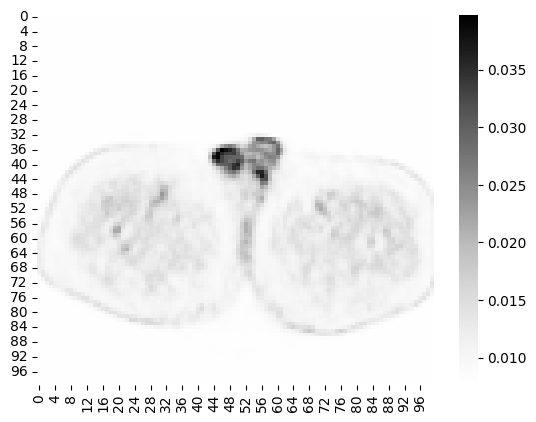

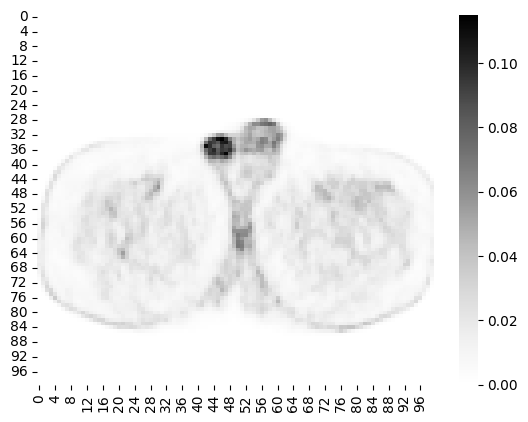

beg


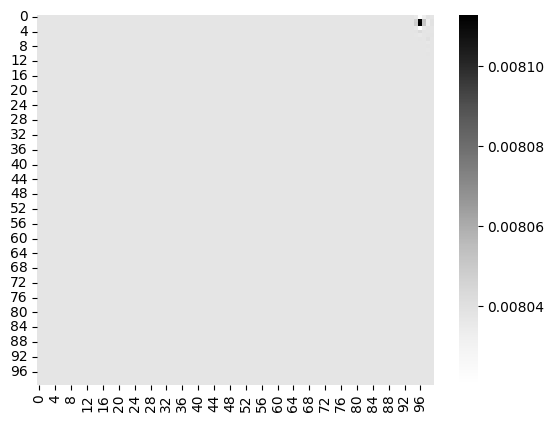

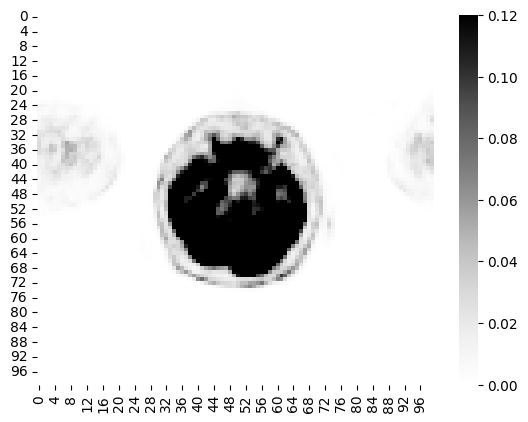

im_a (425, 100, 100) im_b (425, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_4/pat_4_sudy_0_2023-04-18_Standardized_transbbbformed.nii.gz
end


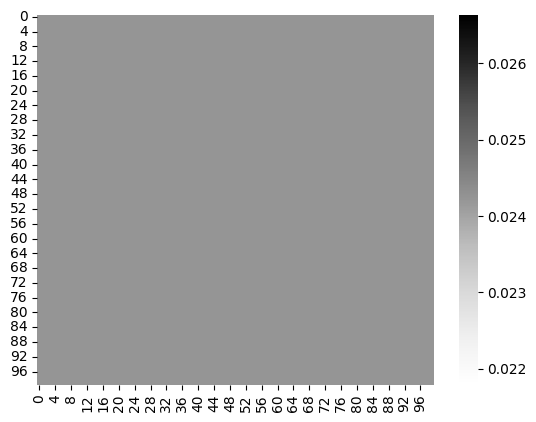

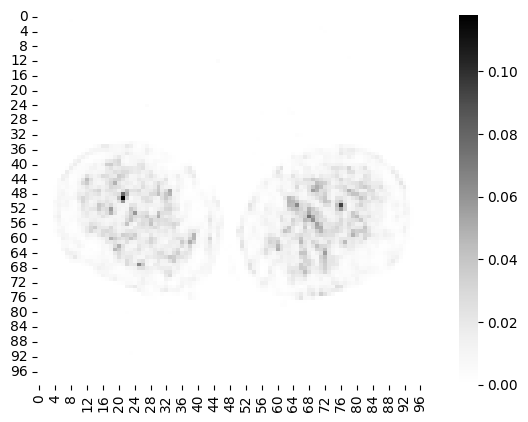

beg


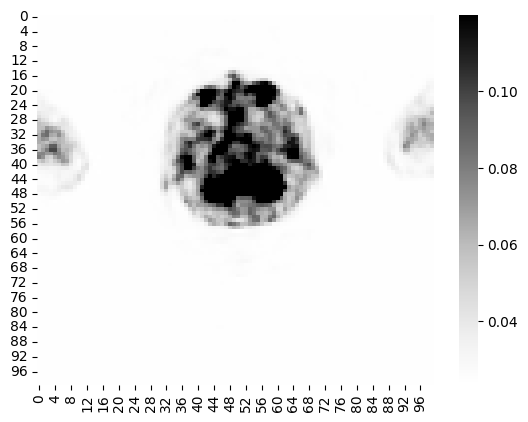

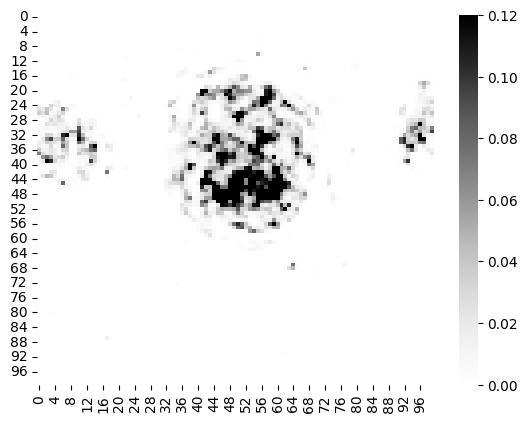

im_a (425, 100, 100) im_b (425, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_14/pat_14_sudy_0_2022-12-02_Standardized_transbbformed.nii.gz
end


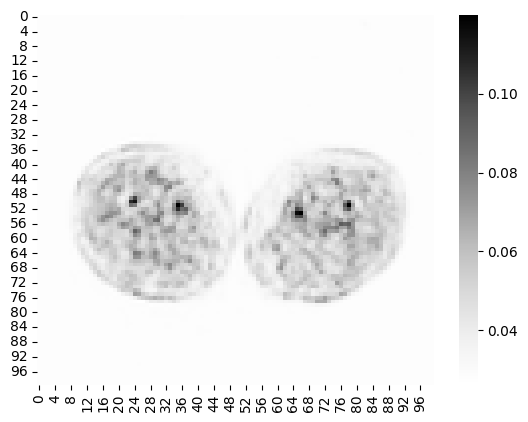

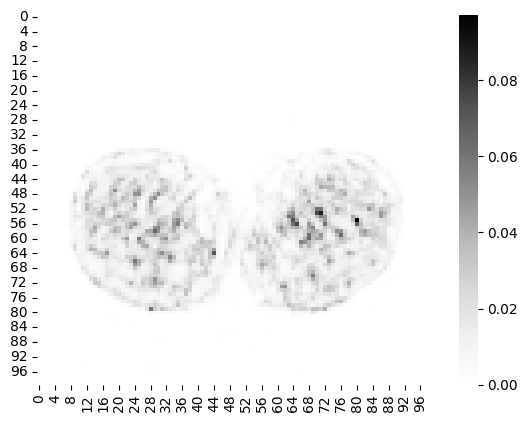

beg


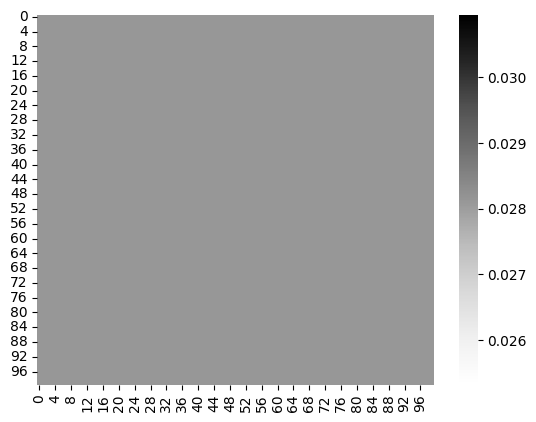

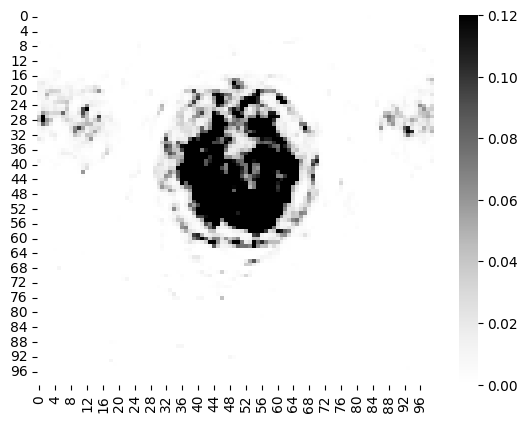

im_a (425, 100, 100) im_b (425, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_24/pat_24_sudy_0_2023-01-02_Standardized_transbbbformed.nii.gz
end


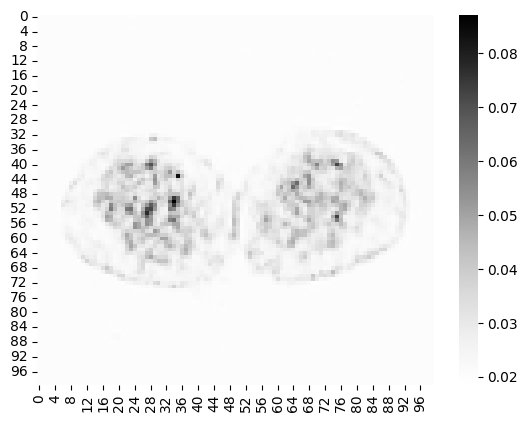

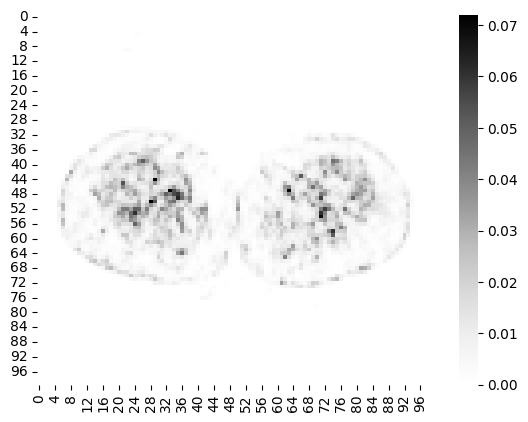

beg


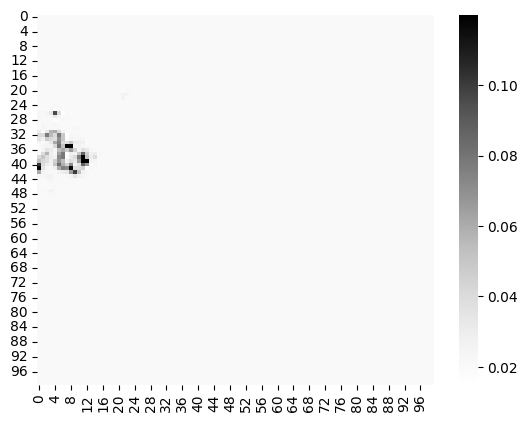

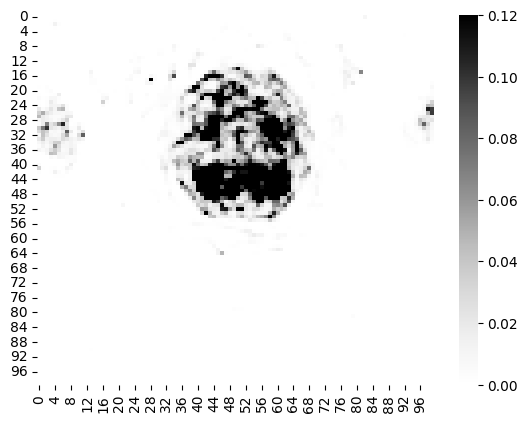

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_22/pat_22_sudy_0_2022-12-22_Standardized_Uptake_transbbbformed.nii.gz
end


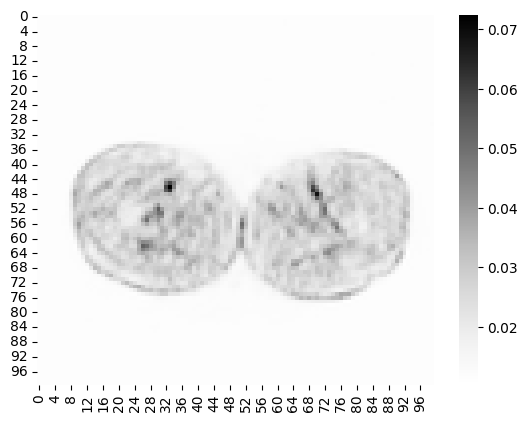

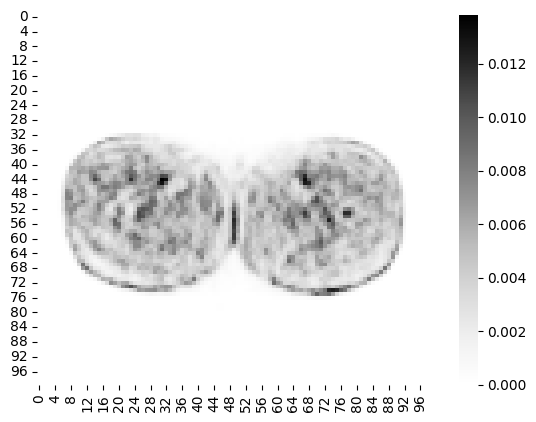

beg


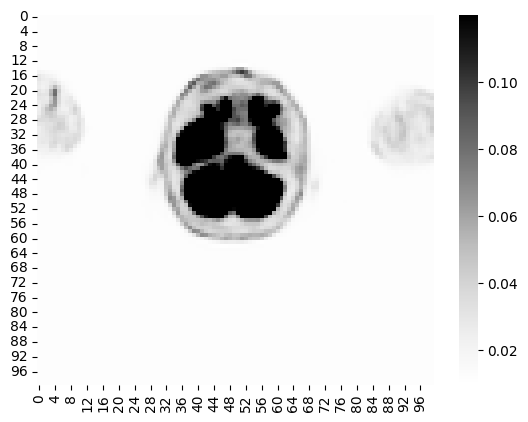

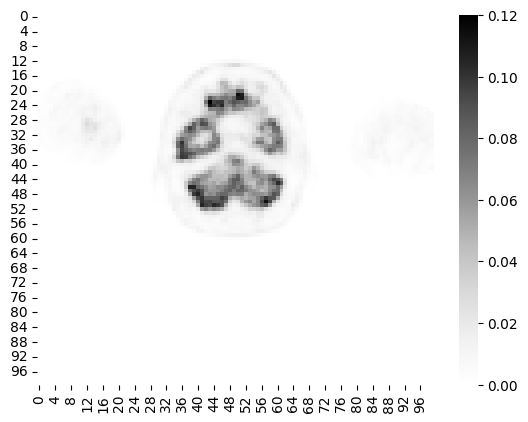

im_a (425, 100, 100) im_b (425, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_31/pat_31_sudy_0_2022-12-14_Standardized_transbbformed.nii.gz
end


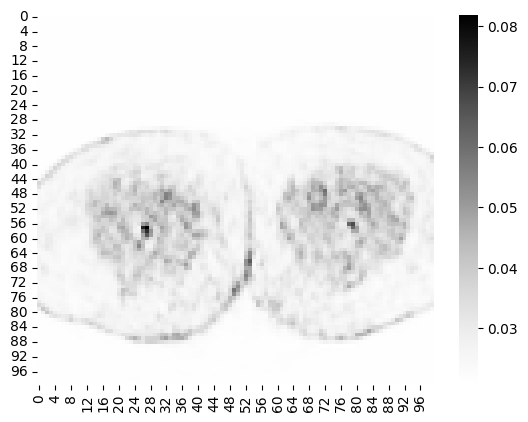

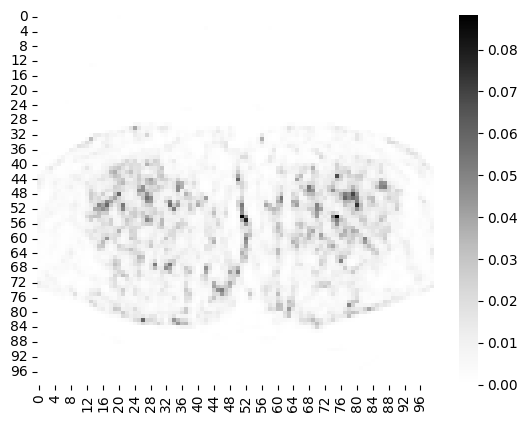

beg


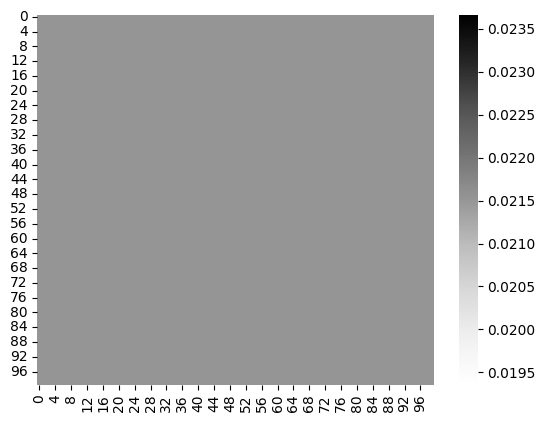

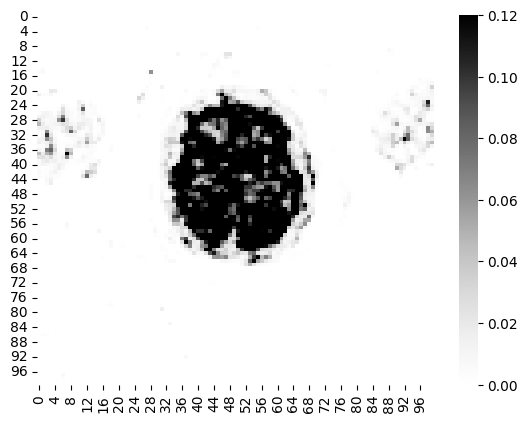

im_a (425, 100, 100) im_b (425, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_2/pat_2_sudy_0_2022-09-16_Standardized_Uptake_transbbformed.nii.gz
end


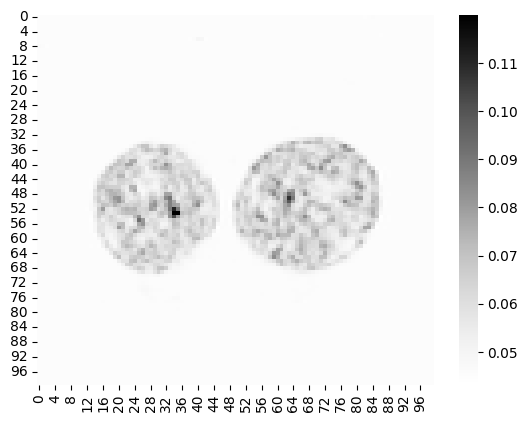

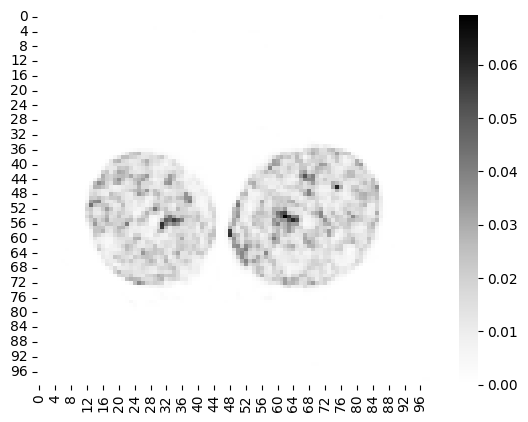

beg


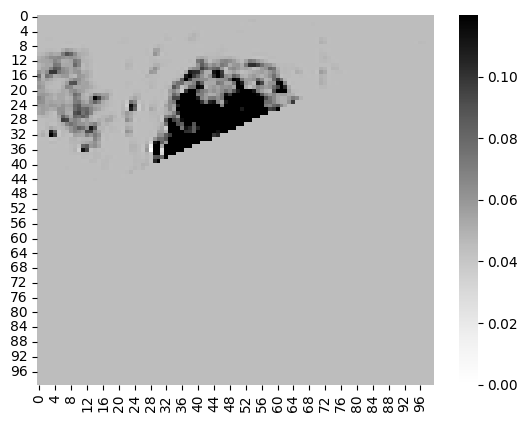

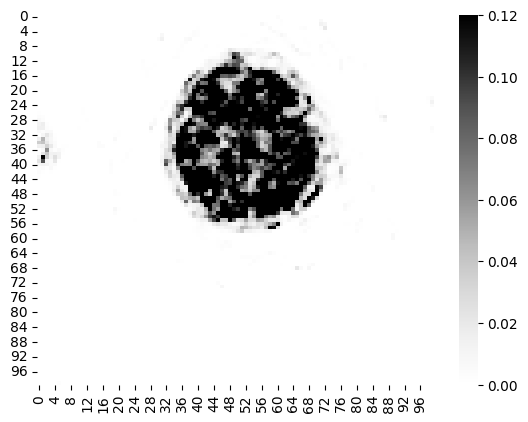

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_9/pat_9_sudy_0_2022-10-25_Standardized_transbbbformed.nii.gz
end


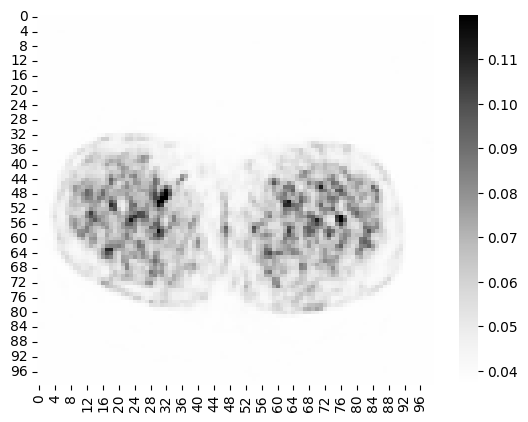

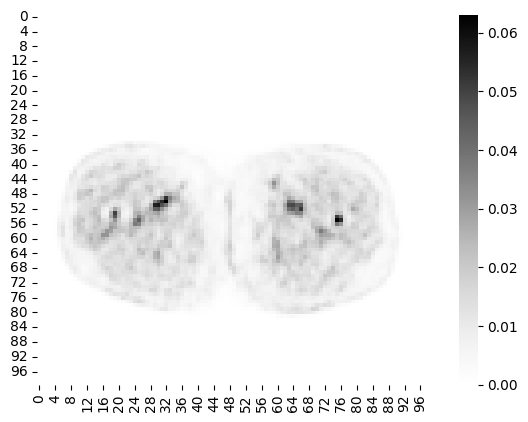

beg


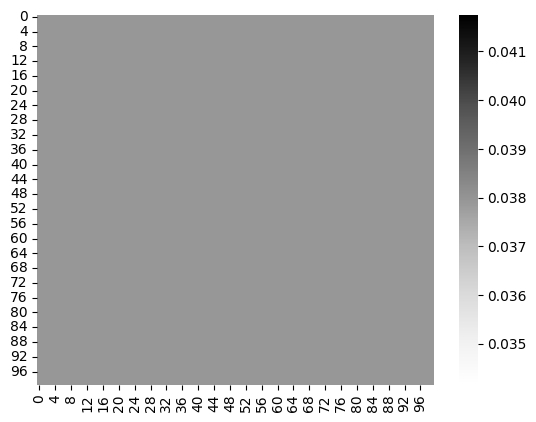

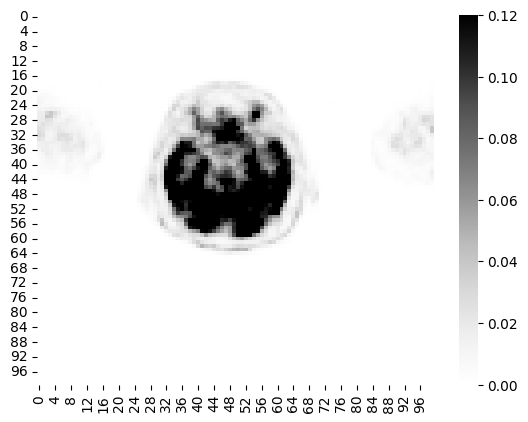

im_a (488, 100, 100) im_b (488, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_11/pat_11_sudy_0_2023-02-10_Standardized_transbbformed.nii.gz
end


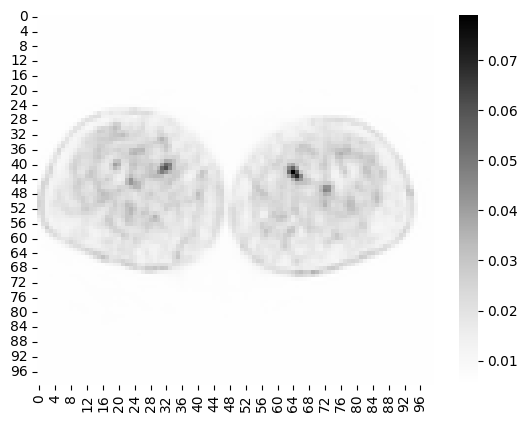

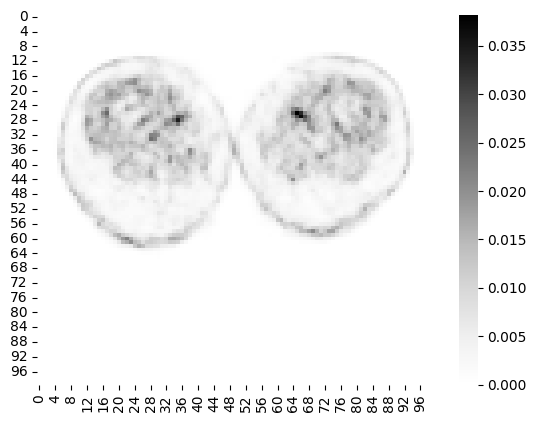

beg


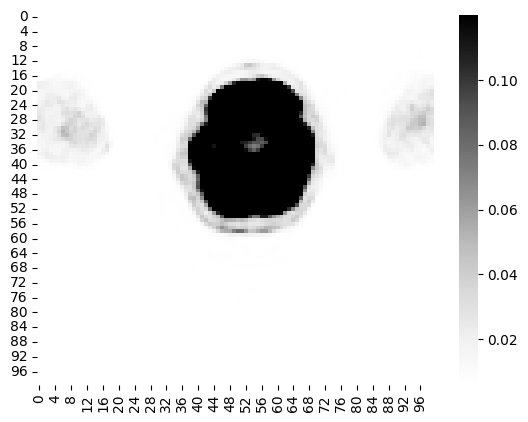

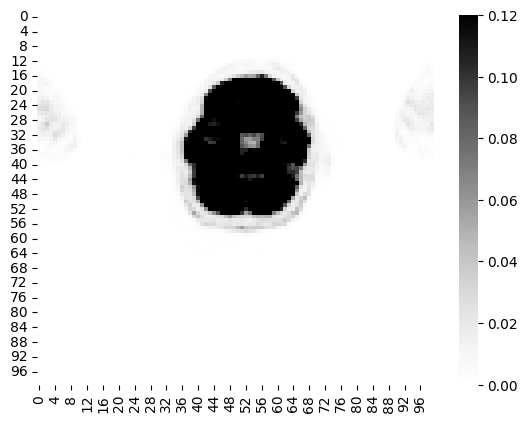

im_a (425, 100, 100) im_b (425, 100, 100) path_a /workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered/pat_18/pat_18_sudy_0_2023-01-16_Standardized_transbformed.nii.gz
end


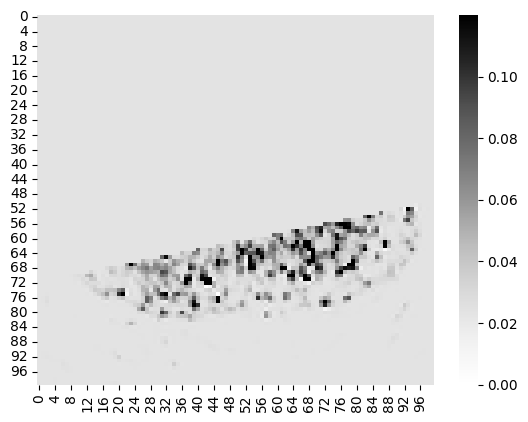

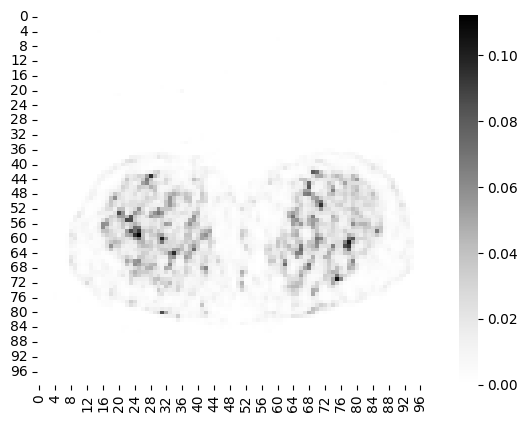

beg


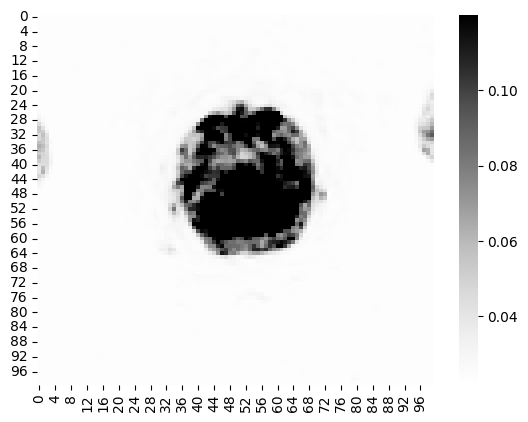

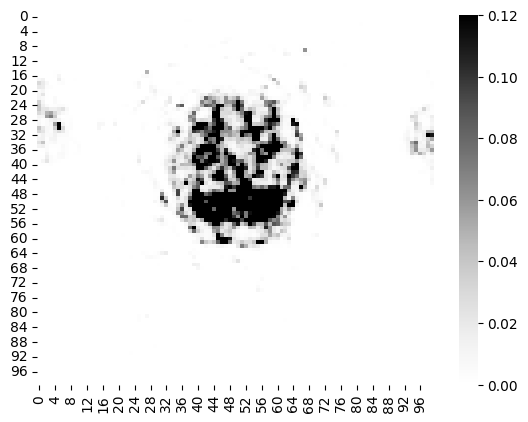

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [25]:

def display_pair_b(path_a,path_b):
    im_a=sitk.GetArrayFromImage(sitk.ReadImage(path_a))[:,50:-50,50:-50]
    im_b=sitk.GetArrayFromImage(sitk.ReadImage(path_b))[:,50:-50,50:-50]

    im_a=im_a-np.min(im_a)
    im_b=im_b-np.min(im_b)

    im_a=im_a/np.max(im_a)
    im_b=im_b/np.max(im_b)

    im_a= np.clip(im_a,0.0,0.12)
    im_b= np.clip(im_b,0.0,0.12)

    im_a_for_max = einops.reduce(im_a,'z x y-> z','sum') 
    # slice=np.argmax(im_a_for_max)
    slice=1
    # fig, axs = plt.subplots(ncols=2)
    print(f"im_a {im_a.shape} im_b {im_b.shape} path_a {path_a}")

    total_slices=420
    diff= im_a.shape[0]-total_slices
    diff_quart= diff/6

    diff_end=round(diff_quart*5)
    diff_bed=round(diff_quart)

    print("end")
    sns.heatmap(im_a[diff_end,:,:],cmap='Greys')
    plt.show()
    sns.heatmap(im_b[diff_end,:,:],cmap='Greys')
    plt.show()

    print("beg")
    sns.heatmap(im_a[im_a.shape[0]-diff_bed,:,:],cmap='Greys')
    plt.show()
    sns.heatmap(im_b[im_a.shape[0]-diff_bed,:,:],cmap='Greys')
    plt.show()    


list(itertools.starmap(display_pair_b,pairs_paths ))


In [16]:
import pandas as pd
import os
import numpy as np
df= pd.read_csv('/workspaces/pilot_lymphoma/data/all_deauville_anon - Copy of Form responses 1.csv')

registered_path= '/workspaces/pilot_lymphoma/data/fid_registered/fiducially_registered'
patient_paths=os.listdir(registered_path)


labels=np.array(list(map(lambda pathh : df.loc[df['Unnamed: 0']==pathh]['deauville_2'].to_numpy()[0],patient_paths)))>3
len(labels)

28